In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Recording Real-Time User Events in Vertex AI Search Datastores

<table align="left">
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab&destination=vais_notebook-from_notebook-colab&url=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Frecord_user_events.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab_ent&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab_ent&destination=vais_notebook-from_notebook-colab_ent&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fcolab%2Fimport%2Fhttps%3A%252F%252Fraw.githubusercontent.com%252FGoogleCloudPlatform%252Fapplied-ai-engineering-samples%252Fmain%252Fgenai-on-vertex-ai%252Fvertex_ai_search%252Frecord_user_events.ipynb"">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-vai_workbench&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-vai_workbench&destination=vais_notebook-from_notebook-vai_workbench&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fworkbench%2Fdeploy-notebook%3Fdownload_url%3Dhttps%3A%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Frecord_user_events.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-github&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-github&destination=vais_notebook-from_notebook-github&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Frecord_user_events.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


| | |
|----------|-------------|
| Author(s)   | Hossein Mansour|
| Reviewers(s) | 	Abhishek Bhagwat|
| Last updated | 2025-01-07: The first draft |

# Overview


In this notebook, we demonstrate how to [record real-time](https://cloud.google.com/generative-ai-app-builder/docs/record-user-events) user events for Vertex AI Search (VAIS) Website Datastores. While there are subtle differences, a very similar approach can be applied to recording real-time user events for other types of VAIS datastores such as unstructured datastores containing PDFs.


User events are reported by customers as their users interact with their search and recommendation apps in different ways. [Event types](https://cloud.google.com/generative-ai-app-builder/docs/user-events#types) supported by the broader family of VAIS apps include search, view homepage, view category, view item, add to card, purchased, media play, and media complete. User events are the primary way VAIS recommendations apps learn from user behavior. They can also lead to significant improvements in search apps hence are highly encouraged.


In the context of Website search, VAIS considers both the relevancy of the page to the query as well as the likelihood of a click learned from user behavior on the public web to come up with the final ranking of the results. Reranking based on user behavior is most helpful for ambiguous head queries where many results are relevant to the query and the tie breaker is the user preference captured via click events.


While VAIS is designed to provide a great experience out-of-the-box, there is a possibility to further enhance the user experience by reporting historical and real time user events by the customer as additional signals. This enables the search app to learn from user interaction with the search results which leads to increasingly better ranking over time. This is particularly helpful when user behavior on a customer's domain significantly deviates from user behavior on the web. It is also important for authenticated search where the target pages are not publically available.

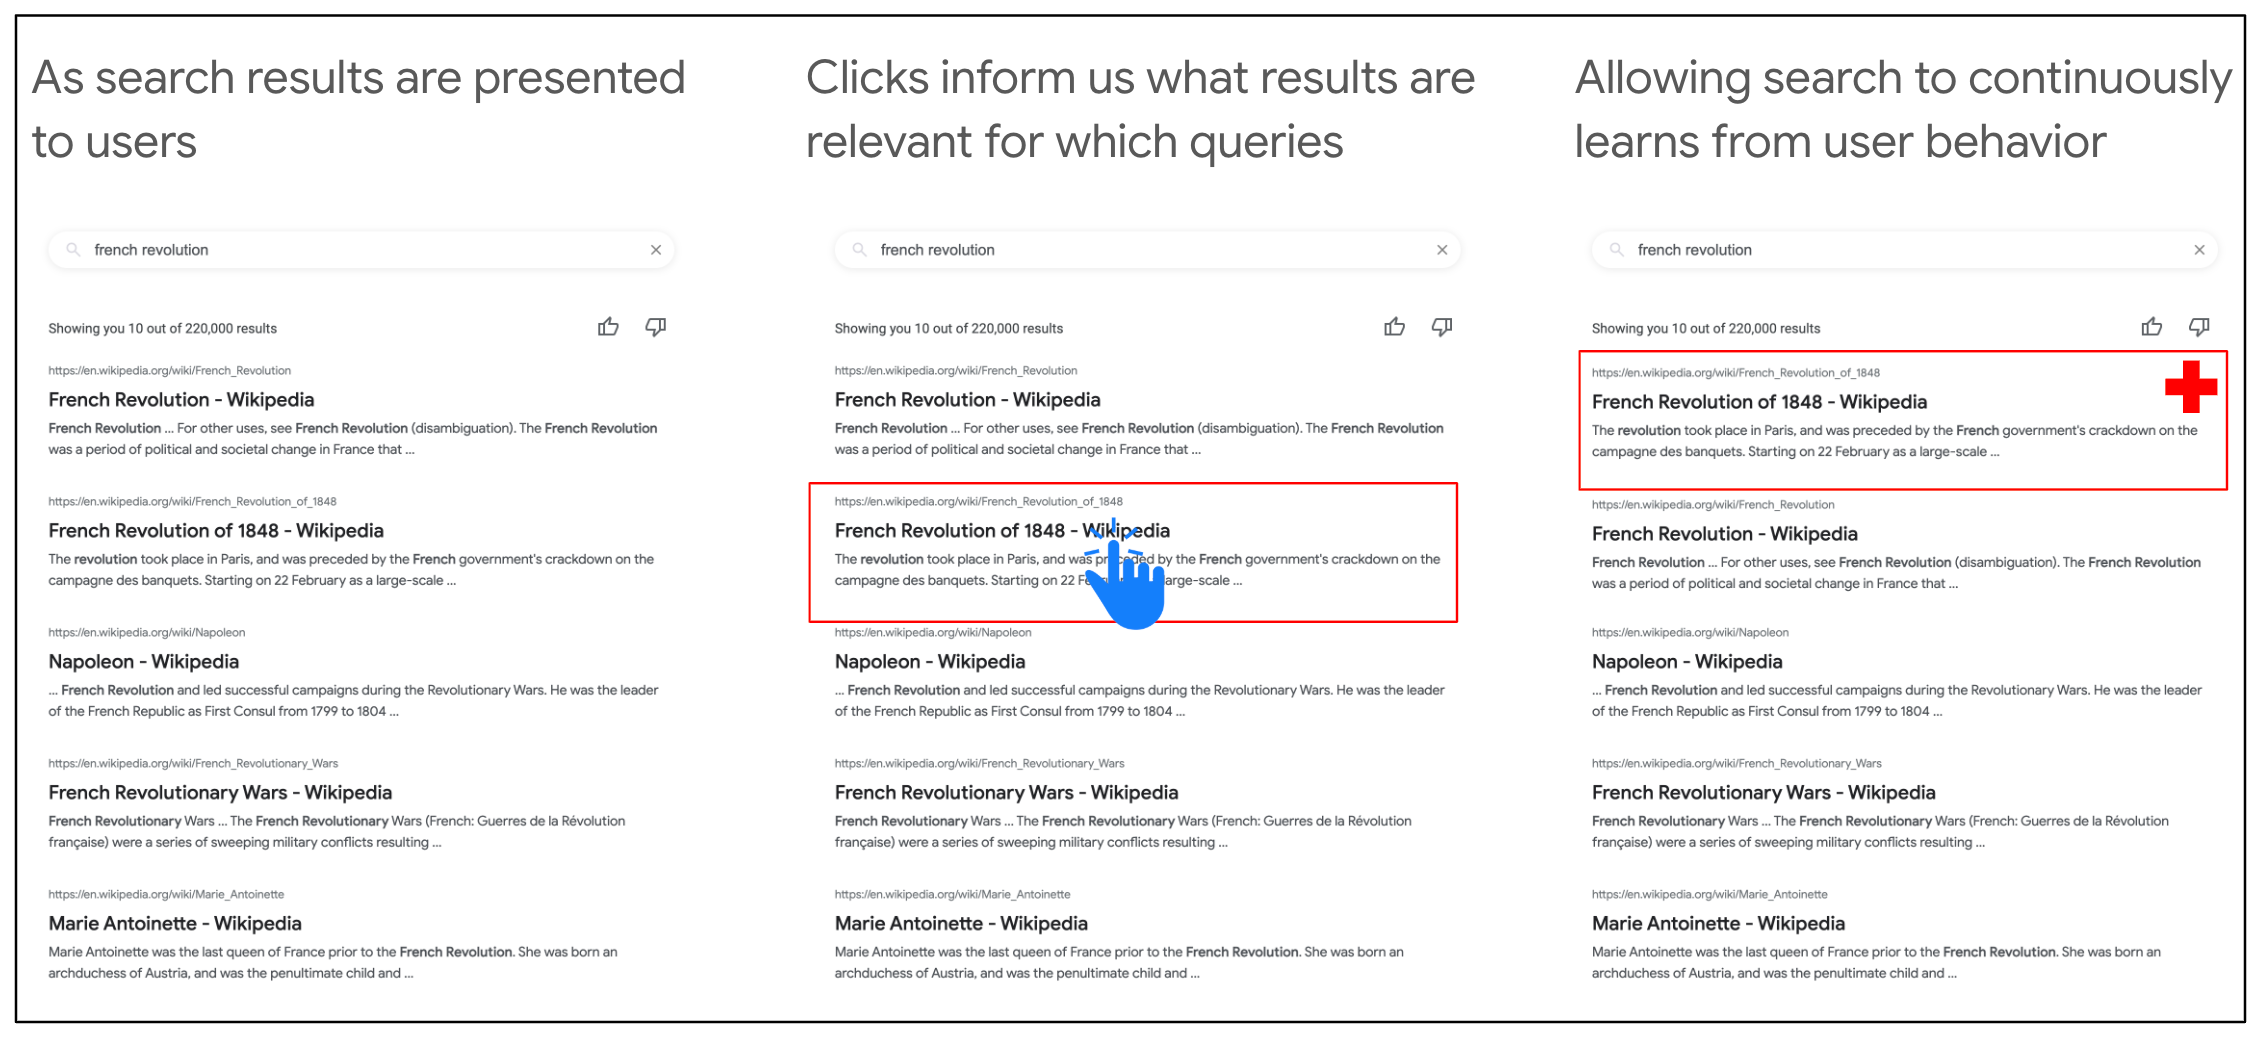


User events can influence the ranking of the results in three tires:
- **Popularity** where pages with more clicks get prioritized
- **Relevancy** where the relevance of pages to a certain query is judged by the likelihood of a click learned from the past interaction of ALL users with the app
- **Personalization** where the preference of a certain user is captured via their own past interactions with the app
Depending on the quality and quantity of user events one or more of these tiers can get unlocked. Enabling these tiers does not require any explicit opt-in or config change by the customer.


In addition to better ranking, user events enable VAIS to report on more advanced search metrics such as CTR in the [analytics tab](https://cloud.google.com/generative-ai-app-builder/docs/view-analytics).


The focus of this notebook is on recording real-time user events, however VAIS allows for [importing historical user events](https://cloud.google.com/generative-ai-app-builder/docs/import-user-events) as well.


Additionally in this notebook we'll focus on explicit reporting of user events via `userEvents.write` method but there is an alternative way of leveraging [JavaPixel](https://cloud.google.com/generative-ai-app-builder/docs/record-user-events#record-with-javascript-pixel) to achieve the same goal which is the recommended approach if the customer can control the page source.


To run this notebook you need an existing advanced website search datastore.


We will perform the following steps:


- Define helper functions to issue search, and report search and view-item events
- Define a function to generate and report synthetic user events
- Issue a sample search and report corresponding events
- Cleanup


REST API is used throughout this notebook. Please consult the [official documentation](https://cloud.google.com/generative-ai-app-builder/docs/apis) for alternative ways to achieve the same goal, namely Client libraries and RPC.




# Vertex AI Search
Vertex AI Search (VAIS) is a fully-managed platform, powered by large language models, that lets you build AI-enabled search and recommendation experiences for your public or private websites or mobile applications


VAIS can handle a diverse set of data sources including structured, unstructured, and website data, as well as data from third-party applications such as Jira, Salesforce, and Confluence.


VAIS also has built-in integration with LLMs which enables you to provide answers to complex questions, grounded in your data


# Using this Notebook
If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library. Outside of Colab you'll also notice comments in code cells that look like #@something, these trigger special Colab functionality but don't change the behavior of the notebook.


This tutorial uses the following Google Cloud services and resources:


- Service Usage API
- Discovery Engine API


This notebook has been tested in the following environment:


- Python version = 3.10.12
- google.cloud.storage = 2.8.0
- google.auth = 2.27.0


# Getting Started


The following steps are necessary to run this notebook, no matter what notebook environment you're using.


If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started)


## Google Cloud Project Setup


1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs
2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project)
3. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
4. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com)


## Google Cloud Permissions


Ideally you should have [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project to run this notebook. If that is not an option, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access)
- **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
- **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
- **`roles/discoveryengine.admin`** to modify discoveryengine assets



#Setup Environment

## Authentication

 If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [1]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()
    print("Authenticated")

Authenticated


In [2]:
from google.auth import default
from google.auth.transport.requests import AuthorizedSession

creds, _ = default()
authed_session = AuthorizedSession(creds)

## Import Libraries

In [3]:
import time

## Configure environment

The Location of a Datastore is set at the time of creation and it should be called appropriately to query the Datastore. Given that our sample website datastore is `global`, we use that within this notebook.

You can find more information regarding the `Location` of datastores and associated limitations [here](https://cloud.google.com/generative-ai-app-builder/docs/locations#specify_a_multi-region_for_your_data_store).

`VAIS_BRANCH` is the branch of VAIS to use. Given that this feature is available in GA, we use V1 here.

In [11]:
PROJECT_ID = '' # @param {type: 'string'}
DATASTORE_ID = '' # @param {type: 'string'}
LOCATION = "global"  # @param ["global", "us", "eu"]
VAIS_BRANCH = "v1"  # @param {type: 'string'}

# Step 1. Define Helper functions

In this section we define helper functions to issue a sample search request to a datastore, report a search event, report a view-item event, and pull all of these together to simulate the flow of a user doing search and clicking on a result.


## Helper functions to issue basic search on a Datastore

In [ ]:
def search(project_id: str, location: str, datastore_id: str, searchQuery: str, pageSize: int):
    """Searches a datastore using the provided query."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/servingConfigs/default_search:search',
        headers={
            'Content-Type': 'application/json',
        },
        json={
            "query": searchQuery,
            "pageSize": pageSize
        },
    )
    return response

## Helper functions to report search and view-item events

In [ ]:
def search_event(project_id: str, location: str, datastore_id: str, user_pseudo_id: str, search_query: str, impressions: list, attribution_token: str):
    """Report search events."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/userEvents:write',
        headers={
            'Content-Type': 'application/json',
        },
        json={
          'eventType': 'search',
          'userPseudoId': user_pseudo_id,
          'searchInfo': {
              'searchQuery': search_query,
          },
          'documents': impressions,
          'attributionToken': attribution_token,
        },
    )
    return response

def view_event(project_id: str, location: str, datastore_id: str, user_pseudo_id: str, viewed_uri: str, attribution_token: str):
    """Report view-item events."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/userEvents:write',
        headers={
            'Content-Type': 'application/json',
        },
        json={
          'attributionToken': attribution_token,
          'eventType': 'view-item',
          'userPseudoId': user_pseudo_id,
          'documents': [{'uri': viewed_uri}],
        },
    )
    return response

# Step 2. Define a function to generate and report synthetic user events

In this function we issue a search, report a search event which includes the corresponding attribution token and impressions (i.e. list of results shown to the end user), and finally report a view-item event which shows which link did the user click on.

For the purpose of this notebook, we extracxt the list of impressions from the search response, however some customers may apply their own post-processiong logic in which case the final ranking of the results may differ from the one in VAIS response. For those cases the explicit list of impressions should be provided in the following format:
```
impressions = [
    {
        'uri': 'https://example.com/page-1'
    },
    {
        'uri': 'https://example.com/page-2'
    },
    {
        'uri': 'https://example.com/page-3[link text](https://)'
    },
]
```

Note that the only change needed to apply the same approach to reporting user events for other types of datastores is to [identify documents](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1/projects.locations.dataStores.userEvents#documentinfo) with other fields such as docuemnt id.


On a broader note, a similar approach can be applied to reporting user events for recommendation apps. See the full anatomy of a user event in [reference documentation](https://cloud.google.com/generative-ai-app-builder/docs/reference/rest/v1/projects.locations.dataStores.userEvents). Noteworthy is the atteributes field which can be used to improve recommendation by providing additional user info such as their age, gender, location, etc.

In [ ]:
def generate_synthetic_events(
    project_id: str,
    location: str,
    datastore_id: str,
    user_pseudo_id: str,
    search_query: str,
    page_size: int,
    viewed_uri: str,
):
    """Issue a searc hand report the corresponding events."""

    search_resp = search(project_id, location, datastore_id, search_query, page_size)
    print("Search response:")
    print(search_resp.json())
    attribution_token = search_resp.json()["attributionToken"]

    impressions = [{"uri": result["document"]["derivedStructData"]["link"]} for result in search_resp.json()["results"]]
    print("Impression list:")
    print(impressions)
    time.sleep(1)

    search_event_resp = search_event(project_id, location, datastore_id, user_pseudo_id, search_query, impressions, attribution_token)
    print("Sent search event:")
    print(search_event_resp.json())
    time.sleep(2)

    view_event_resp = view_event(project_id, location, datastore_id, user_pseudo_id, viewed_uri, attribution_token)
    print("Sent view event:")
    print(view_event_resp.json())

# Step 3. Issue a sample search and report corresponding events

In this example we have a VAIS website datastore for VAIS documentation. An end user with user_pseudo_id of Alice searches for the term `filter results`. The top five results are presented and Alice clickes on one of the results, a page describing how to filter generic search results in this instance.

Please modify these parameters as it relates to you target datastore.

In [ ]:
generate_synthetic_events(
    project_id = PROJECT_ID,
    location = LOCATION,
    datastore_id = DATASTORE_ID,
    user_pseudo_id = "Alice",
    search_query = "filter results",
    page_size = 5,
    viewed_uri = "https://cloud.google.com/generative-ai-app-builder/docs/filter-search-metadata",
)

# Cleanup

Cleanup resources created in this notebook, specifically purging the events recorded in the notebook.

Purge events can optionally have filters to only purge a subset of events. We purge events reported for "Alice" userPseudoId.



In [ ]:
def purge_event(project_id: str, location: str, datastore_id: str, purge_filter: str):
    """Purge events matching a filter."""
    response = authed_session.post(
        f'https://discoveryengine.googleapis.com/{VAIS_BRANCH}/projects/{project_id}/locations/{location}/collections/default_collection/dataStores/{datastore_id}/userEvents:purge',
        headers={
            'Content-Type': 'application/json',
        },
        json={
          "filter": purge_filter
        },
    )
    return response

resp = purge_event(
          project_id = PROJECT_ID,
          location = LOCATION,
          datastore_id = DATASTORE_ID,
          purge_filter = 'eventTime>"2024-12-23T18:25:43.511Z" userPseudoId="Alice"'
      )
print(resp.json())